In [1]:
##READ ME
## TEIS IFSP Teaming Data Question

[The Tennessee Early Intervention System (TEIS)](https://www.tn.gov/didd/for-consumers/tennessee-early-intervention-system-teis.html) is a program that provides services to children ages birth up to age three who have disabilities or other developmental delays. In this project, you'll be looking into how teams that support children work together. 

You've been provided a spreadsheet containing data on children who received IFSP Teaming services. This spreadsheet is divided into two tabs.
* Tab 1 contains log details of all children receiving IFSP Teaming services between January 1, 2022 and January 31, 2023. See the data dictionary for a description of each column.
* Tab 2 contains a list of all children with IFSPs during the same timeframe. This includes a point of entry office, a referral date and an exit date.

Analysis Questions:
* How many children are receiving co-visits? What is the rate of co-visits? That is, out of children how have an IFSP, how many are receiving co-visits?
* Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits?
* What is the cadence of co-visits?
* In what setting do co-visits typically occur?
* Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within th esame agency? 
* Does participation vary by service type? by point of entry?

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
##EDA....part 1 import sreadsheet
##https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook
## xls = pd.ExcelFile('path_to_file.xls')
## df1 = pd.read_excel(xls, 'Sheet1')
## df2 = pd.read_excel(xls, 'Sheet2')

xlsx_teis = pd.ExcelFile('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx')
compiled_df1 = pd.read_excel(xlsx_teis, 'Compiled_IFSP Teaming')
children_df2 = pd.read_excel(xlsx_teis, 'All Children with IFSPs')


In [10]:
compiled_df1.head() 

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


In [11]:
children_df2.head()

,POE,Child ID,Referral Date,Exit Date
0,ET,508615,2021-08-06,NaT
1,ET,488455,2021-11-02,NaT
2,ET,494500,2020-12-14,NaT
3,ET,515143,2021-11-22,NaT
4,ET,505490,2021-06-15,NaT


In [17]:
print(compiled_df1.info(verbose=True))
print(children_df2.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CHILD_ID              9543 non-null   int64         
 1   SERVICE_DATE          9543 non-null   datetime64[ns]
 2   START_TIME            9532 non-null   object        
 3   END_TIME              9532 non-null   object        
 4   SERVICE_SETTING       9533 non-null   object        
 5   SERVICE DELIVERY      9543 non-null   object        
 6   ADD_USER              9543 non-null   object        
 7   ADD_DATE              9543 non-null   datetime64[ns]
 8   IFSP Teaming ID name  9543 non-null   object        
 9   Agency Name           9543 non-null   object        
 10  Agency Type           9543 non-null   object        
 11  Service Name          9543 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 894.8+ KB
None
<clas

In [18]:
print(compiled_df1.describe())
print(children_df2.info())

            CHILD_ID
count    9543.000000
mean   503923.012051
std     17148.944343
min    457136.000000
25%    492312.500000
50%    505531.000000
75%    515686.000000
max    542122.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138664 entries, 0 to 138663
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   POE            138664 non-null  object        
 1   Child ID       138664 non-null  int64         
 2   Referral Date  138664 non-null  datetime64[ns]
 3   Exit Date      15607 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 4.2+ MB
None


In [21]:
## min / max dates in compiled_df1 / children_df2
##https://stackoverflow.com/questions/23178129/getting-min-and-max-dates-from-a-pandas-dataframe
##min(df['some_property']) / max(df['some_property'])

print(min(compiled_df1['SERVICE_DATE']))
print(max(compiled_df1['SERVICE_DATE']))
print(min(children_df2['Referral Date']))
print(max(children_df2['Referral Date']))
print(min(children_df2['Exit Date']))
print(max(children_df2['Exit Date']))

2022-01-03 00:00:00
2023-01-31 00:00:00
2019-01-11 00:00:00
2023-01-31 00:00:00
NaT
NaT


In [23]:
##check unique count compiled_df1
#https://sparkbyexamples.com/pandas/pandas-count-unique-values-in-column/
#Count unique on multiple columns
#count = df[['Courses','Fee']].nunique()

count_df1 = compiled_df1[['CHILD_ID','SERVICE_SETTING','SERVICE DELIVERY','IFSP Teaming ID name','Agency Name','Agency Type','Service Name']].nunique() 
count_df1

CHILD_ID                4789
SERVICE_SETTING            4
SERVICE DELIVERY           4
IFSP Teaming ID name       3
Agency Name               85
Agency Type                3
Service Name              23
dtype: int64

In [24]:
##check unique count children_df2
count_df2 = children_df2[['POE','Child ID']].nunique() 
count_df2

POE             9
Child ID    19623
dtype: int64

In [34]:
##check unique values compiled_df1
##https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
print(compiled_df1['SERVICE_SETTING'].unique())
print(compiled_df1['SERVICE DELIVERY'].unique())
print(compiled_df1['IFSP Teaming ID name'].unique())
print(compiled_df1['Agency Name'].unique())
print(compiled_df1['Agency Type'].unique())
print(compiled_df1['Service Name'].unique())

['Community-based' 'Telehealth' 'Home' 'Other' nan]
['Service Delivered' 'Absence Due to Family' 'Family No Show'
 'Absence Due to Provider']
['IEP Meeting' 'Co-Visit' 'IFSP Meeting']
["Siskin Children's Institute (EIRA)" 'LTVEC' 'First Steps, Inc (EIRA)'
 'Sunshine Early Intervention - Knox Cty ARC'
 'Physical Therapy Services, PA (EIRA)' 'LeBonheur EI & Dev (LEAD) (EIRA)'
 'LeBonheur EI & Dev (LEAD) (vendor)'
 'Shelby Residential & Voc Svcs(SRVS) (EIRA)' 'Signal Centers, Inc.'
 'Therapy & Learning Center, Inc. (EIRA)'
 'Susan Gray School - Vanderbilt Univ'
 'Support Solutions of the Mid-South (CS Patterson)' "Kid's Putnam, Inc."
 'Little Folks Arc of Washington Co.'
 'Michael Dunn Center/ The Henry Center' 'Pediatric Language Clinic'
 'BRIDGES - Tennessee Tech University' 'Vanderbilt Bill Wilkerson Center'
 'BEST (Blind-Visually Impaired Early Svcs Tn)'
 'Can Do Kids Pediatric Therapy Services, LLC'
 'Morristown Hamblen Child Care Center' 'Emory Valley Center'
 'Progressive Direction

In [35]:
##check unique values children_df2
print(children_df2['POE'].unique())

['ET' 'FT' 'GN' 'MD' 'NW' 'SC' 'SE' 'SW' 'UC']


In [37]:
##Top 10 Agency Name compiled_df1
##https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column
##df['name'].value_counts().nlargest(5)

print(compiled_df1['Agency Name'].value_counts().nlargest(10))

LeBonheur EI & Dev (LEAD) (vendor)            924
Emory Valley Center                           730
Siskin Children's Institute (EIRA)            685
Physical Therapy Services, PA (EIRA)          589
LeBonheur EI & Dev (LEAD) (EIRA)              505
Therapy & Learning Center, Inc. (EIRA)        479
Kid's Putnam, Inc.                            445
WAVES, Inc.                                   429
Shelby Residential & Voc Svcs(SRVS) (EIRA)    323
Community Development Center                  304
Name: Agency Name, dtype: int64


In [40]:
##count IFSP Teaming ID
##https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/
##data['column_name'].value_counts()[value]
##['IEP Meeting' 'Co-Visit' 'IFSP Meeting']

print(compiled_df1['IFSP Teaming ID name'].value_counts()['IEP Meeting'])
print(compiled_df1['IFSP Teaming ID name'].value_counts()['Co-Visit'])
print(compiled_df1['IFSP Teaming ID name'].value_counts()['IFSP Meeting'])

632
4091
4820


<Axes: >

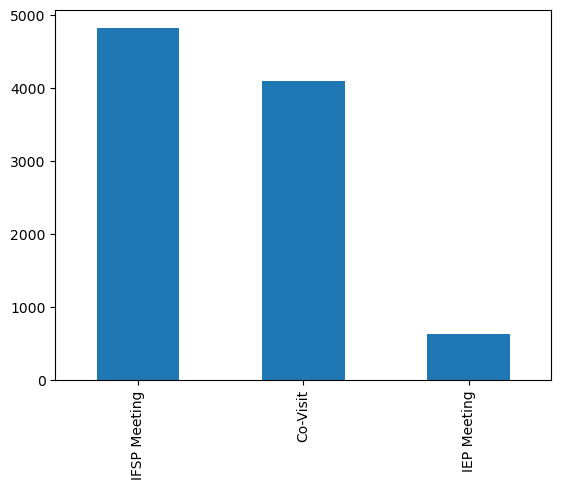

In [45]:
##view IFSP Teaming ID in chart
##used notes/example from socrata ap project
##convert to numeris required / example: map_res_df['query_count'] = pd.to_numeric(map_res_df['query_count'])
ifsp_plot = compiled_df1['IFSP Teaming ID name'].value_counts()
ifsp_plot.plot(kind='bar')

<Axes: >

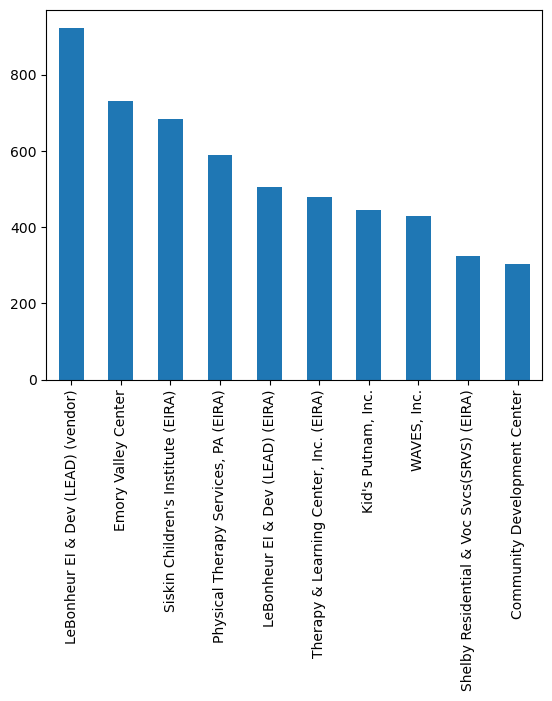

In [51]:
##view IFSP Teaming ID in chart
##used notes/example from socrata ap project
agency_top10_plot = compiled_df1['Agency Name'].value_counts().nlargest(10)
agency_top10_plot.plot(kind='bar')


plt.rcParams['figure.figsize'] = [10, 4]
map_res_df.plot.line(x='month_name', y='query_count')
plt.title('Map Queries Total Per Month Review 2014-2021')
plt.xlabel('Month')
plt.ylabel('Query Count')